## Links

- Pipeline for learning models with known architectures https://github.com/linkedin/detext

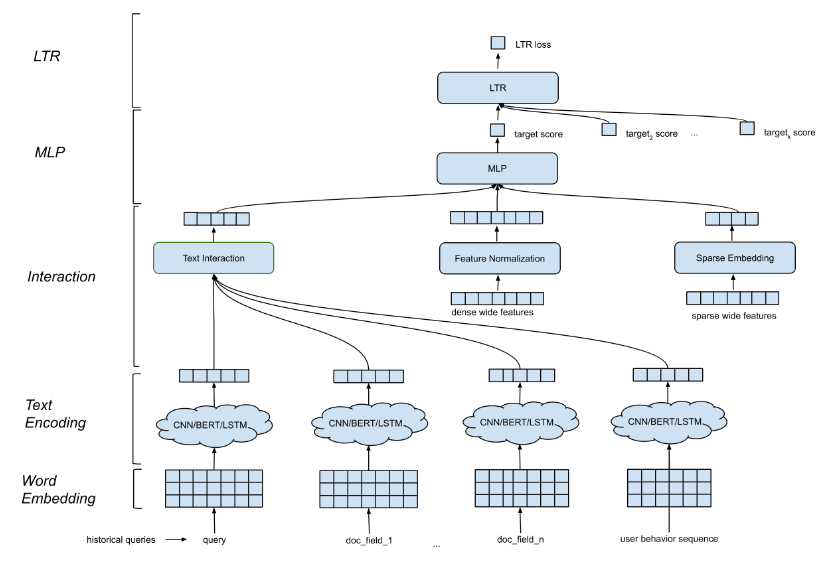

- j

## Installations

In [ ]:
!pip install biopython
!pip install bioc

In [ ]:
!pip install -U pip setuptools wheel
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
!pip install nltk

## Code

### PyBioC

In [ ]:
# !pip install git+https://github.com/OntoGene/PyBioC.git
# !pip install bioc

In [ ]:
class BioC2JSON:
    def node(this, node):
        json_node = {'refid': node.refid, 'role': node.role}
        return json_node

    def relation(this, rel):
        json_rel = {}
        json_rel['id'] = rel.id
        json_rel['infons'] = rel.infons
        json_rel['nodes'] = [this.node(n) for n in rel.nodes]
        return json_rel

    def location(this, loc):
        json_loc = {'offset': int(loc.offset), 'length': int(loc.length)}
        return json_loc

    def annotation(this, note):
        json_note = {}
        json_note['id'] = note.id
        json_note['infons'] = note.infons
        json_note['text'] = note.text
        json_note['locations'] = [this.location(l)
                                  for l in note.locations]
        return json_note

    def sentence(this, sent):
        json_sent = {}
        json_sent['infons'] = sent.infons
        json_sent['offset'] = int(sent.offset)
        json_sent['text'] = sent.text
        json_sent['annotations'] = [this.annotation(a)
                                    for a in sent.annotations]
        json_sent['relations'] = [this.relation(r)
                                  for r in sent.relations]
        return json_sent

    def passage(this, psg):
        json_psg = {}
        json_psg['infons'] = psg.infons
        json_psg['offset'] = int(psg.offset)
        json_psg['text'] =  psg.text
        json_psg['text'] =  psg.text if psg.text else ""
        json_psg['sentences'] = [this.sentence(s)
                                 for s in psg.sentences]
        json_psg['annotations'] = [this.annotation(a)
                                   for a in psg.annotations]
        json_psg['relations'] = [this.relation(r)
                                 for r in psg.relations]
        return json_psg

    def document(this, doc):
        json_doc = {}
        json_doc['id'] = doc.id
        json_doc['infons'] = doc.infons
        json_doc['passages'] = [this.passage(p)
                                for p in doc.passages]
        json_doc['relations'] = [this.relation(r)
                                 for r in doc.relations]
        return json_doc

    def collection(this, collection):
        json_collection = {}
        json_collection['source'] = collection.source
        json_collection['date'] = collection.date
        json_collection['key'] = collection.key
        json_collection['infons'] = collection.infons
        json_collection['documents'] = [this.document(d)
                                        for d in collection.documents]
        return json_collection

class JSON2BioC:

    def node(this, json_node):
        node = bioc.BioCNode()
        node.refid = json_node['refid']
        node.role = json_node['role']
        return node

    def relation(this, json_rel):
        rel = bioc.BioCRelation()
        rel.id = json_rel['id']
        rel.infons = json_rel['infons']
        rel.nodes = [this.node(n) for n in json_rel['nodes']]
        return rel

    def location(this, json_loc):
        loc = bioc.BioCLocation()
        loc.offset = str(json_loc['offset'])
        loc.length = str(json_loc['length'])
        return loc

    def annotation(this, json_note):
        note = bioc.BioCAnnotation()
        note.id = json_note['id']
        note.infons = json_note['infons']
        note.text = json_note['text']
        note.locations = [this.location(l)
                          for l in json_note['locations']]
        return note

    def sentence(this, json_sent):
        sent = bioc.BioCSentence()
        sent.infons = json_sent['infons']
        sent.offset = str(json_sent['offset'])
        sent.text = json_sent['text']
        sent.annotations = [this.annotation(a)
                            for a in json_sent['annotations']]
        sent.relations = [this.relation(r)
                          for r in json_sent['relations']]
        return sent

    def passage(this, json_psg):
        psg = bioc.BioCPassage()
        psg.infons = json_psg['infons']
        psg.offset = str(json_psg['offset'])
        psg.text = json_psg.get('text')
        psg.sentences = [this.sentence(s)
                         for s in json_psg['sentences']]
        psg.annotations = [this.annotation(a)
                           for a in json_psg['annotations']]
        psg.relations = [this.relation(r)
                         for r in json_psg['relations']]
        return psg

    def document(this, json_doc):
        doc = bioc.BioCDocument()
        doc.id = json_doc['id']
        doc.infons = json_doc['infons']
        doc.passages = [this.passage(p)
                        for p in json_doc['passages']]
        doc.relations = [this.relation(r)
                         for r in json_doc['relations']]
        return doc

    def collection(this, json_collection):
        collection = bioc.BioCCollection()
        collection.source = json_collection['source']
        collection.date = json_collection['date']
        collection.key = json_collection['key']
        collection.infons = json_collection['infons']
        collection.documents = [this.document(d)
                                for d in json_collection['documents']]
        return collection

In [ ]:
from bioc import biocjson

def read_bioc_to_json(path_to_read, path_to_save, file_full_name):
  name, format = file_full_name.split('.')
  # Deserialize ``fp`` to a BioC collection object.
  print(f'Read file {file_full_name} from {path_to_read}')
  with open(path_to_read + file_full_name, 'r') as fp:
      collection = biocjson.load(fp)
  bioc2json = BioC2JSON()
  bioc_json = bioc2json.collection(collection)
  print(f'Save file {name}_refd.{format} to {path_to_save}')
  with open(f"{path_to_save}{name}_refd.{format}", 'w') as f:
      json.dump(bioc_json, f, indent=4)
      print(file=f)

In [ ]:
# from bioc import BioCXMLWriter, BioCCollection, BioCDocument, BioCPassage

# writer = BioCXMLWriter()
# writer.collection = BioCCollection()
# collection = writer.collection
# collection.date = '20150301'
# collection.source = 'ngy1 corpus'

# document = BioCDocument()
# document.id = '123456'  # pubmed id

# passage = BioCPassage()
# passage.put_infon('type', 'paragraph')
# passage.offset = '0'
# passage.text = 'This is a biomedical sentence about various rare diseases.'
# document.add_passage(passage)

# collection.add_document(document)

# print(writer)

In [ ]:
# collection.__dir__()

### Efetch operation (doi -> PMC)

In [ ]:
import urllib
from xml.dom import minidom

def get_pmid_from_doi(doi,
                          email='YOUR EMAIL GOES HERE',
                          tool='SimonsPythonQuery',
                          database='pubmed'):

    params = {
        'db':database,
        'tool':tool,
        'email':email,
        'term':doi,
        'usehistory':'y',
        'retmax':1
    }

    # try to resolve the PubMed ID of the DOI

    url = 'http://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?' + \
            urllib.parse.urlencode(params)

    data = urllib.request.urlopen(url).read()
    # parse XML output from PubMed&#8230;
    xmldoc = minidom.parseString(data)
    ids = xmldoc.getElementsByTagName('Id')
    ids = xmldoc.getElementsByTagName('Id')
    if len(ids) == 0:
      print("There is no PMID for that doi: {}")
      return
    pmid = ids[0].childNodes[0].data
    return pmid

In [ ]:
from Bio import Entrez
import xml.etree.ElementTree as ET

def pmid2pmcid(pmid, email='example@gmail.com'):
    Entrez.email = email

    handle = Entrez.elink(dbfrom="pubmed", db="pmc", linkname="pubmed_pmc", id=pmid, retmode="text")

    handle_read = handle.read()
    handle.close()

    root = ET.fromstring(handle_read)

    pmcid = ""

    for link in root.iter('Link'):
        for id in link.iter('Id'):
            pmcid = id.text
    return pmcid

### Json parser funcs

In [3]:
import json
import bioc
import os

In [9]:
def extract_text_from_json_by_sections(json_data, ignorance_sec_types):
    all_text = {}
    for document in json_data.get('documents', []):
        for passage in document.get('passages', []):
            sec_type = passage.get('infons', {}).get('section_type', '')
            if sec_type in ignorance_sec_types:
                # print(f"Ignore type {passage.get('infons', {}).get('section_type', '')}")
                continue
            if all_text.get(sec_type, ''):
                all_text[sec_type] += passage.get('text', '') + "\n"
            else:
                all_text[sec_type] = passage.get('text', '') + "\n"
                
    return all_text


In [7]:
def extract_text_from_json(json_data, ignorance_sec_types):
    all_text = ''
    for document in json_data.get('documents', []):
        for passage in document.get('passages', []):
            sec_type = passage.get('infons', {}).get('section_type', '')
            if sec_type in ignorance_sec_types:
                # print(f"Ignore type {passage.get('infons', {}).get('section_type', '')}")
                continue
            all_text += passage.get('text', '') + "\n"
                
    return all_text

In [ ]:
if '':
    print("hhhh")

### Config json dira and download test files (run only once!)

In [ ]:
!mkdir json json_refd

In [ ]:
pmc_test_lst = ["PMC4836051",
                "PMC9049613",
                "PMC8025206",
                "PMC3822444",]

with open("json_bacteria_food_ids.txt", 'w') as fw:
    fw.write('\n'.join(pmc_test_lst))

**Upload** json-s list in `txt` format

In [ ]:
!for pmid in $(cat json_bacteria_food_ids.txt); do wget -O json/${pmid}.json https://www.ncbi.nlm.nih.gov/research/bionlp/RESTful/pmcoa.cgi/BioC_json/${pmid}/ascii; done

In [ ]:
json_lst = os.listdir('json/')

try:
  json_lst.remove(".ipynb_checkpoints")
except:
  pass

In [ ]:
path_to_read = 'json/'
path_to_save = 'json_refd/'

In [ ]:
for i in json_lst:
  read_bioc_to_json(path_to_read, path_to_save, i)

### Upload json data

In [1]:
path_to_read = 'json/'
path_to_save = 'json_refd/'

In [4]:
refd_json_lst = os.listdir('json_refd/')
try:
  refd_json_lst.remove(".ipynb_checkpoints")
except:
  pass

In [5]:
data_jsons = {}
for infile_refd in refd_json_lst:
  with open(f"{path_to_save}{infile_refd}") as f:
    data_jsons[infile_refd.split('.')[0]] = json.load(f)


In [10]:
all_texts = {}
all_texts_by_sections = {}
ignorance_sec_types = ['REF', 'METHODS', 'COMP_INT']
for pmid, data_json in data_jsons.items():
  print(f'Process article: {pmid}')
  doc = data_json['documents'][0]
  print(f'doc keys: {doc.keys()}')
  passages = doc['passages']
  print(f"Numer of passages: {len(passages)}")
  sec_type_set = set()
  for passage in passages:
    sec_type = passage.get('infons', {}).get('section_type', '')
    sec_type_set.add(sec_type)

  all_texts[pmid] = extract_text_from_json(data_json, ignorance_sec_types)
  all_texts_by_sections[pmid] = extract_text_from_json_by_sections(data_json, ignorance_sec_types)
  print(sec_type_set)
  print('\n')


Process article: PMC3822444_refd
doc keys: dict_keys(['id', 'infons', 'passages', 'relations'])
Numer of passages: 4793
{'METHODS', 'FIG', 'REF', 'INTRO', 'ABSTRACT', 'TITLE', 'TABLE'}


Process article: PMC9049613_refd
doc keys: dict_keys(['id', 'infons', 'passages', 'relations'])
Numer of passages: 220
{'FIG', 'REF', 'INTRO', 'ABSTRACT', 'CONCL', 'TITLE', 'TABLE', 'COMP_INT'}


Process article: PMC4836051_refd
doc keys: dict_keys(['id', 'infons', 'passages', 'relations'])
Numer of passages: 218
{'METHODS', 'FIG', 'REF', 'INTRO', 'ABSTRACT', 'ABBR', 'CONCL', 'DISCUSS', 'TITLE', 'TABLE', 'RESULTS'}


Process article: PMC8025206_refd
doc keys: dict_keys(['id', 'infons', 'passages', 'relations'])
Numer of passages: 103
{'METHODS', 'REF', 'FIG', 'INTRO', 'ABSTRACT', 'DISCUSS', 'TITLE', 'TABLE', 'RESULTS', 'SUPPL'}




In [198]:
data_jsons.keys()

dict_keys(['PMC3822444_refd', 'PMC9049613_refd', 'PMC4836051_refd', 'PMC8025206_refd'])

In [ ]:
# !curl https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db=pubmed&term=10.1038/nrg2509&format=json | jq
#

In [ ]:
pmid = get_pmid_from_doi("10.1016/j.jnutbio.2018.09.015")
print(pmid)

## Tokenize and lemmatize

#### Test libraries

In [ ]:
from spacy.lang.en import English
from nltk.tokenize import (
                    sent_tokenize,
                    word_tokenize )
from nltk import download as nltk_dwnl

In [ ]:
nltk_dwnl('punkt')

In [ ]:
nlp = English()
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
tokenizer = nlp.tokenizer
f = nlp("Hello everyone. Welcome to GeeksforGeeks. You are studying NLP article")


In [ ]:
import spacy

sp = spacy.load('en_core_web_sm')
sentence = sp(u'Manchester United is looking to sign a forward for $90 million')
for word in sentence:
    print(word.text,  word.pos_, word.dep_)

#### Define dicts

In [13]:
with open("dicts/food_refactored.txt") as f:
  food_list = [line.strip() for line in f]
with open("dicts/bac_refactored.txt") as f:
  bacteria_list = [line.strip() for line in f]


#### Attempt NLTK

In [158]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Скачивайте эти ресурсы в вашей среде исполнения
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/echukhrova/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/echukhrova/nltk_data...


True

In [161]:
# Инициализация лемматизатора
lemmatizer = WordNetLemmatizer()

def lemmatize_word(word):
    """Функция для лемматизации слова."""
    return lemmatizer.lemmatize(word).lower()


# Лемматизация списков еды и бактерий
lemmatized_food = [lemmatize_word(word) for word in food_list]
lemmatized_bacteria = [lemmatize_word(word) for word in bacteria_list]

def label_text(text, food, bacteria):
    """Функция для разметки текста."""
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word not in string.punctuation]
    labels = []
    for token in tokens:
        lemmatized_token = lemmatize_word(token)
        if lemmatized_token in food:
            labels.append(1)
        elif lemmatized_token in bacteria:
            labels.append(3)
        else:
            labels.append(0)
    return tokens, labels

# Пример использования
test_text = "I love drinking green tea, duck breast and brown rice.  It is dealing with escherichia coli."
tokens, labels = label_text(test_text, lemmatized_food, lemmatized_bacteria)
print(tokens, labels)


['i', 'love', 'drinking', 'green', 'tea', 'duck', 'breast', 'and', 'brown', 'rice', 'it', 'is', 'dealing', 'with', 'escherichia', 'coli'] [0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0]


In [167]:
lemmatize_word('chinese')

'chinese'

#### Attempt SpaCy


In [ ]:
import spacy

In [ ]:
# Загрузка модели для spaCy (выполните в вашей среде)
nlp = spacy.load("en_core_web_sm")

# Функция для лемматизации списка слов
def lemmatize_words_spacy(words):
    """Функция для лемматизации списка слов с использованием spaCy."""
    return [nlp(word)[0].lemma_.lower() for word in words]

# Функция для разметки текста
def label_text_spacy(text, food, bacteria):
    """
    Функция для разметки текста на основе списков еды и бактерий.
    Возвращает список токенов и соответствующий список меток для каждого предложения.
    """
    doc = nlp(text)
    labeled_data = []

    for sentence in doc.sents:
        tokens = [token.text.lower() for token in sentence]
        lemmatized_tokens = [token.lemma_.lower() for token in sentence]
        labels = [1 if token in food else 3 if token in bacteria else 0 for token in lemmatized_tokens]
        labeled_data.append((tokens, labels))

    return labeled_data

# Лемматизация списков еды и бактерий
lemmatized_food_spacy = lemmatize_words_spacy(food_list)
lemmatized_bacteria_spacy = lemmatize_words_spacy(bacteria_list)

test_text = "I love eating apples and boneless duck breast. Escherichia coli is a type of bacteria which corrected with black coffee and brown rice."
labeled_sentences = label_text_spacy(test_text, lemmatized_food_spacy, lemmatized_bacteria_spacy)
print(labeled_sentences)



In [ ]:
lemmatize_words_spacy(['brown rice'])

In [ ]:
lemmatized_food_spacy

#### Attempt SpaCy + complex pattern

In [11]:
from modules.entity_finder_class import (
    ComplexPatternFinder, 
    EntityMatcher
)

In [ ]:
em = EntityMatcher()

# Создание паттернов для матчера
em.create_pattern_dict("FOOD", food_list)
em.create_pattern_dict("BACT", bacteria_list)
em.lemmatize_all_pattern_entities()


In [15]:
cpf = ComplexPatternFinder(entity_matcher=em)

In [17]:
short_text = "I love eating apples and duck breast. \n Escherichia coli is a type of bacteria which corrected with black coffee and types of brown rices."
cpf.label_text_spacy(short_text)
print(cpf.labeled_sentence_dataset)

{'sentences': [['i', 'love', 'eat', 'apple', 'and', 'duck', 'breast', '.', '\n '], ['escherichia', 'coli', 'be', 'a', 'type', 'of', 'bacteria', 'which', 'correct', 'with', 'black', 'coffee', 'and', 'type', 'of', 'brown', 'rice', '.']], 'labels': [[0, 0, 0, 1, 0, 1, 0, 0, 0], [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0]], 'sec_type': ['', '']}


In [18]:
cpf._clean_all_labeled_text_data()

 true


In [19]:
doubled_texts = [all_texts['PMC3822444_refd'] for i in range(1000)]
doubled_short_texts = [short_text for i in range(1000)]


In [ ]:
## NO DISABLING

In [25]:
from time import time
from tqdm import tqdm

In [26]:
start = time()
for text in tqdm(doubled_texts ):
    cpf.label_full_text_spacy(text=text, text_id="pmc2")
print("total time: ", time()-start)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [09:48<00:00,  1.70it/s]

total time:  588.9573152065277


In [ ]:
## DISABLING

In [293]:
start = time()
for text in tqdm(doubled_short_texts):
    cpf.label_full_text_spacy(text=sec_text)
print("total time: ", time()-start)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 71.58it/s]

total time:  13.974724292755127


In [259]:
cpf.num_labels_for_text

{1: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [223]:
for pmid, text in tqdm(all_texts.items()):
    print(pmid)
    cpf.label_full_text_spacy(text=sec_text)

 25%|██████████████████████████                                                                              | 1/4 [00:00<00:00,  8.43it/s]

PMC3822444_refd
1  0.1045989990234375
2  0.013860940933227539
PMC9049613_refd
1  0.06471562385559082
2  0.013843536376953125
PMC4836051_refd


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 11.19it/s]

1  0.06497049331665039
2  0.014142990112304688
PMC8025206_refd
1  0.06504678726196289
2  0.013800621032714844


In [203]:
for pmid, sec_item in tqdm(all_texts_by_sections.items()):
    for sec_type, sec_text in sec_item.items():
        cpf.label_text_spacy(text=sec_text, sec_type=sec_type)

  0%|                                                                                                                | 0/4 [00:00<?, ?it/s]

1  0.00908350944519043
2  0.0005443096160888672
1  0.21503424644470215
2  0.04584383964538574
1  0.033692121505737305
2  0.00556492805480957
1  0.47159409523010254
2  0.10928535461425781


 25%|██████████████████████████                                                                              | 1/4 [00:02<00:07,  2.59s/it]

1  1.3929283618927002
2  0.2966744899749756
1  0.007809162139892578
2  0.0003910064697265625
1  0.042357683181762695
2  0.006267070770263672
1  1.1306068897247314
2  0.22420930862426758
1  0.0250551700592041
2  0.003409147262573242
1  0.136260986328125
2  0.02766728401184082


 50%|████████████████████████████████████████████████████                                                    | 2/4 [00:04<00:04,  2.07s/it]

1  0.08199477195739746
2  0.016747474670410156
1  0.009552240371704102
2  0.0008356571197509766
1  0.06804108619689941
2  0.013390302658081055
1  0.053556203842163086
2  0.009613990783691406
1  0.005555629730224609
2  0.0003299713134765625
1  0.1406383514404297
2  0.029252290725708008
1  0.27251386642456055
2  0.05587267875671387


 75%|██████████████████████████████████████████████████████████████████████████████                          | 3/4 [00:05<00:01,  1.61s/it]

1  0.24351811408996582
2  0.05108141899108887
1  0.01917862892150879
2  0.002986907958984375
1  0.06295013427734375
2  0.012164115905761719
1  0.005861520767211914
2  0.00028777122497558594
1  0.0428156852722168
2  0.007483482360839844
1  0.05817699432373047
2  0.011375904083251953
1  0.09447789192199707
2  0.01943492889404297


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:06<00:00,  1.51s/it]

1  0.23027515411376953
2  0.04776573181152344
1  0.018890857696533203
2  0.0028007030487060547
1  0.05640053749084473
2  0.011589765548706055
1  0.05536198616027832
2  0.010447978973388672


- ДОБАВИТЬ ЛЕММАТИЗАЦИЮ **КАЖДОГО СЛОВА** В СЛОВАРЕ СУЩНОСТЕЙ (ТО ЕСТЬ, ИТЕРИРОВАТЬСЯ ПО МНОГОСЛОВНЫМ СУЩНОСТЯМ).

- ЗАТЕМ ПРОВЕСТИ ЛЕММАТИЗАЦИЮ ТЕКСТА ДЛЯ ПОИСКА

- ОСУЩЕСТВИТЬ ПОИСК С ПОМОЩЬЮ МЭТЧЕРА